# Visualizing Earnings Based On College Majors

## Introduction

The dataset is based on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

-  Rank - Rank by median earnings (the dataset is ordered by this column). 
-  Major_code - Major code. 
-  Major - Major description. 
-  Major_category - Category of major. 
-  Total - Total number of people with major. 
-  Sample_size - Sample size (unweighted) of full-time. 
-  Men - Male graduates. 
-  Women - Female graduates. 
-  ShareWomen - Women as share of total. 
-  Employed - Number employed. 
-  Median - Median salary of full-time, year-round workers. 
-  Low_wage_jobs - Number in low-wage service jobs. 
-  Full_time - Number employed 35 hours or more.
-  Part_time - Number employed less 

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money? 
         Using scatter plots 
- What is the most common median salary range?
          Using histograms 
- Which category of majors have higher unemployment rates? 
         Using bar plots

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Read dataset into Pandas
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads.describe()
raw_data_count =recent_grads.shape
recent_grads = recent_grads.dropna()
clean_data_count = recent_grads.shape

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [4]:
raw_data_count

(173, 21)

In [5]:
clean_data_count

(172, 21)

One row of data containing missing value was dropped

## Pandas, Scatter Plots

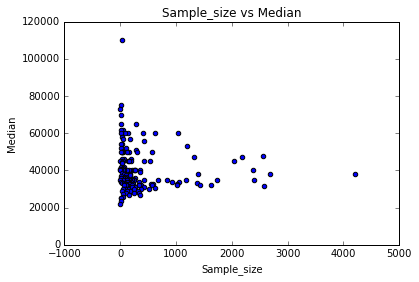

In [9]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs Median')
ax.set_xlabel('Sample_size')


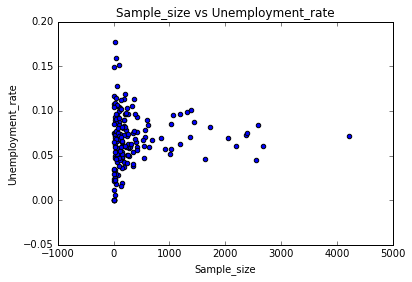

In [10]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs Unemployment_rate')
ax.set_xlabel('Sample_size')

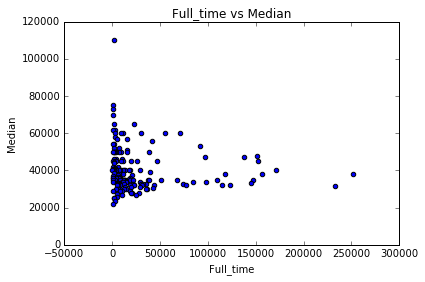

In [11]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs Median')

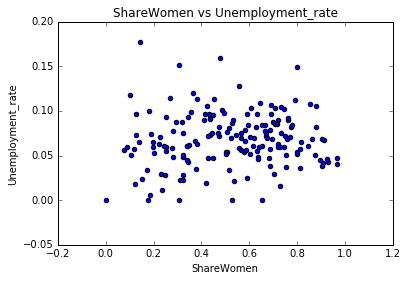

In [12]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs Unemployment_rate')

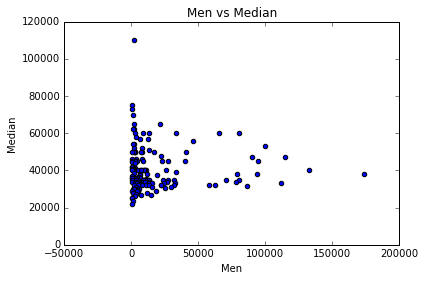

In [13]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs Median')

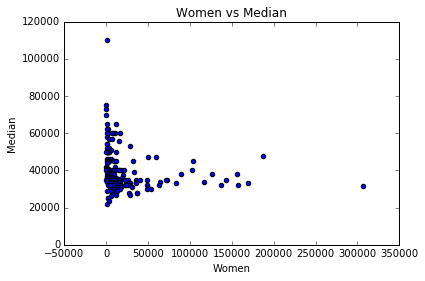

In [14]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs Median')

From the scatter plots above, we can see that:
- There is no strong positive correlation between students in more popular    majors and the money they earn.
- Students that majored in subjects that were majority female do not make more money than their male counterpart and vise versa
- Thers is no link between the number of full-time employees and median salary

## Pandas, Histograms

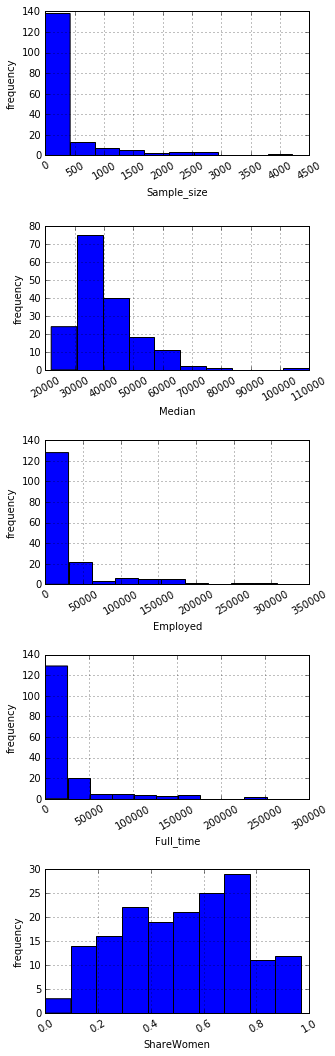

In [55]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]
fig = plt.figure(figsize=(5, 15))
for r in range(5):
    ax = fig.add_subplot(5,1,r+1)
    ax = recent_grads[cols[r]].hist(bins=10)
    ax.set_ylabel('frequency')
    ax.set_xlabel(cols[r])
    plt.xticks(rotation=30)
    fig.tight_layout(pad=2.0)
    
   

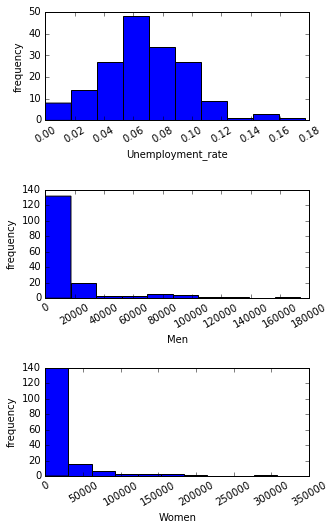

In [56]:

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(5,8):
    ax = fig.add_subplot(5,1,r-4)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=30)
    ax.set_ylabel('frequency')
    ax.set_xlabel(cols[r])
    fig.tight_layout(pad=2.0)

The  most common median salary range is about 30,000 to 40,000

## Pandas, Scatter Matrix Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d359a128>,
      dtype=object)

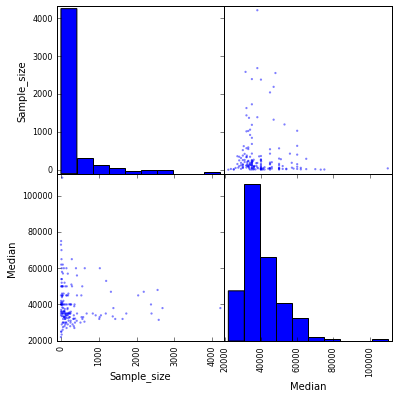

In [79]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d3a72358>,
      dtype=object)

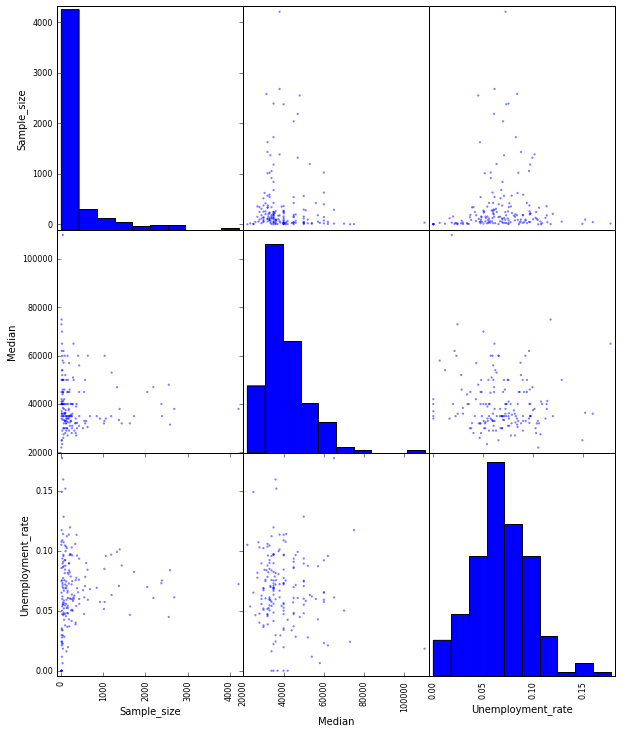

In [81]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,12))

## Pandas, Bar Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d1234d68>,
      dtype=object)

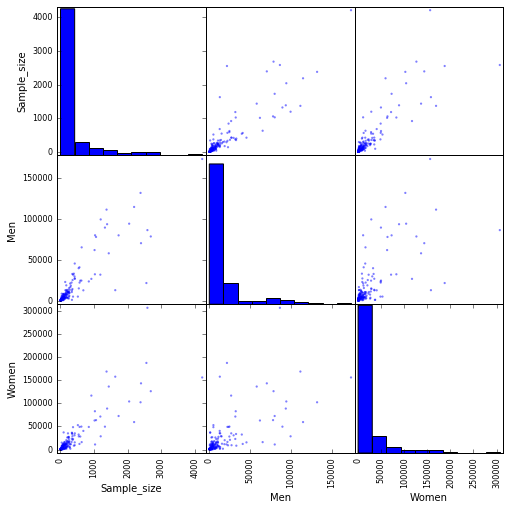

In [92]:
scatter_matrix(recent_grads[['Sample_size', 'Men', 'Women']], figsize=(8,8))

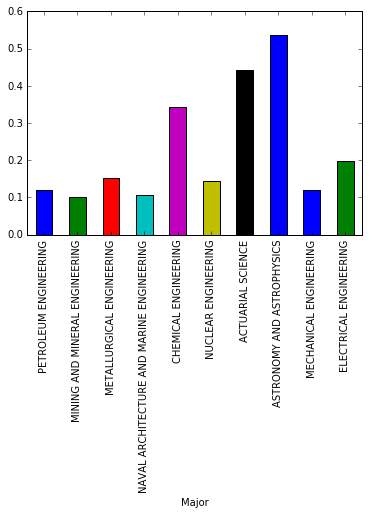

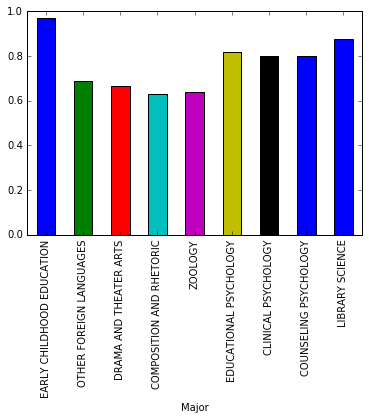

In [85]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

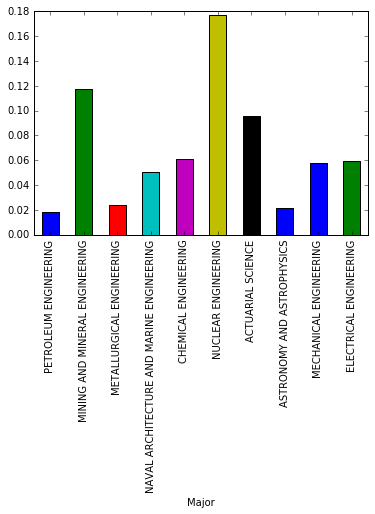

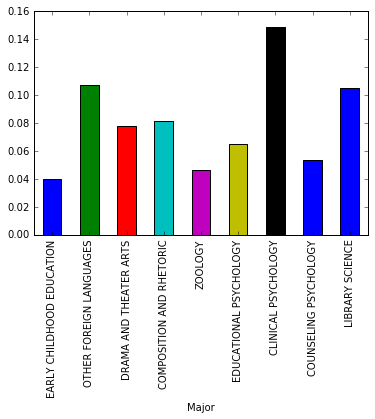

In [91]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

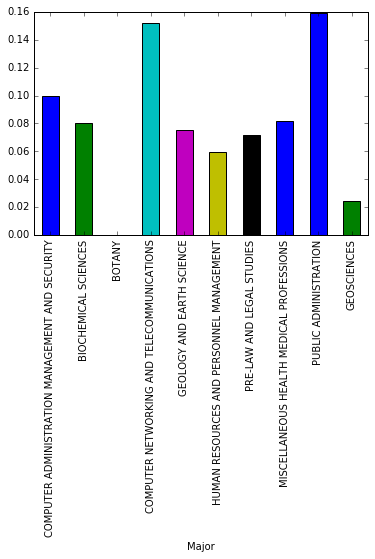

In [118]:
recent_grads[80:90].plot.bar(x='Major', y='Unemployment_rate', legend=False)

Nuclear Engineering and Public administration have a higher unemployment rate compared to other majors.